In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import qmc

from skzeros._domain import Rectangle
from skzeros._zeros import find_zeros

plt.style.use("style.mplstyle")

In [ ]:
N = 100
rng = np.random.default_rng(12345)

In [18]:
sampler = qmc.Sobol(d=2, rng=rng)
tmp = sampler.random(N)
zeros = tmp[:, 0] + tmp[:, 1] * 1j

/home/j-bowhay/development/scikit-poles-zeros/venv/lib/python3.13/site-packages/scipy/stats/_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


In [19]:
def f(z):
    return np.prod(np.subtract.outer(z, zeros), axis=-1)


def f_z(z):
    tmp = np.subtract.outer(z, zeros)
    return np.prod(tmp, axis=-1) * np.sum(1 / tmp, axis=-1)

In [20]:
d = Rectangle(0, complex(1, 1))
res = find_zeros(d, f, f_z, max_arg_principle=7.1)

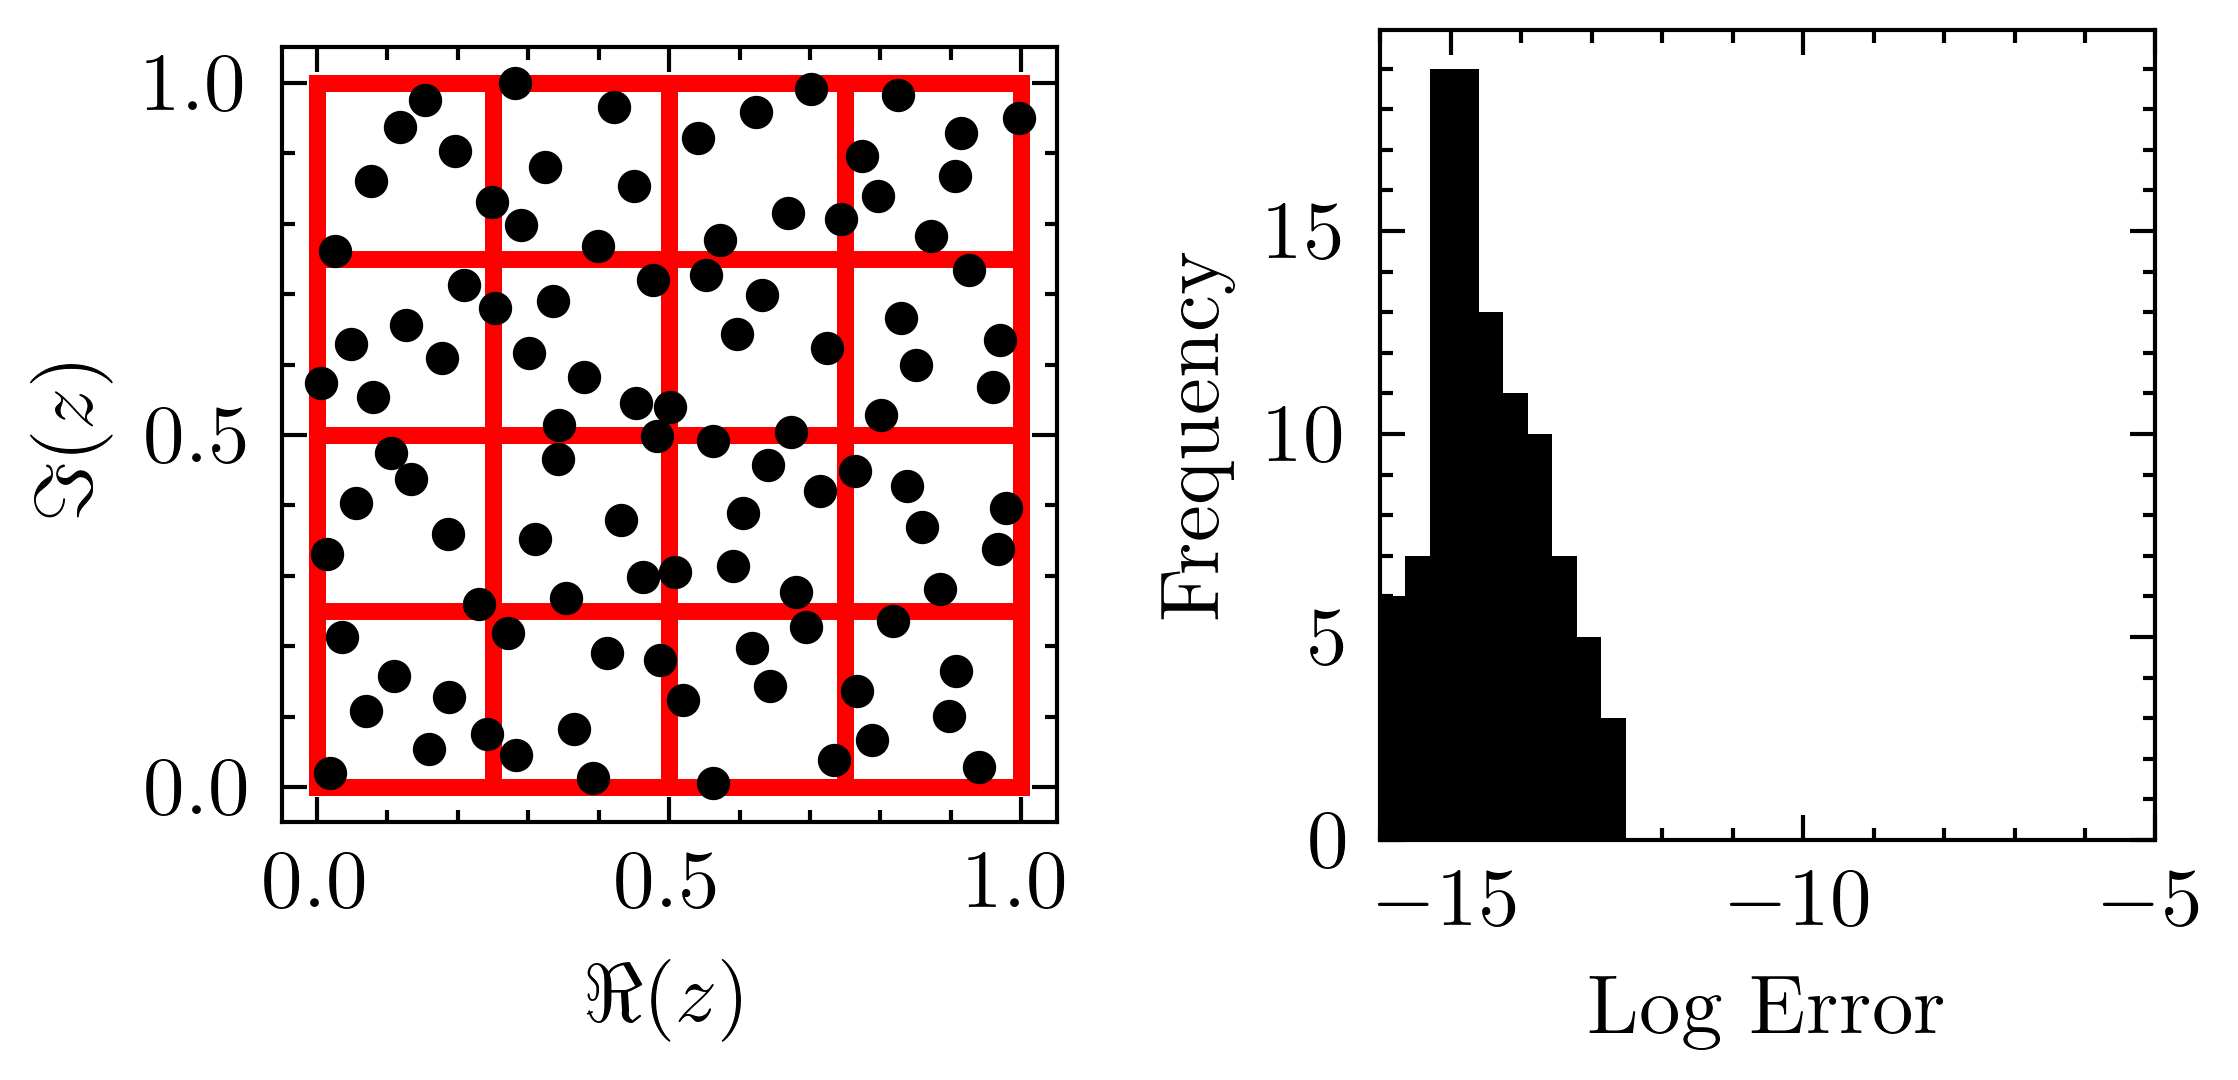

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(4, 2))
d.plot(ax1)
ax1.plot(res.zeros.real, res.zeros.imag, ".")
ax1.set_xlabel(r"$\Re(z)$")
ax1.set_ylabel(r"$\Im(z)$")
ax1.set_aspect("equal", "box")
ax2.hist(np.log10(np.min(np.abs(np.subtract.outer(zeros, res.zeros)), axis=-1)))
ax2.set_xlim([-16, -5])
ax2.set_xlabel("Log Error")
ax2.set_ylabel("Frequency")
plt.tight_layout()
plt.savefig("figures/quasi_random.pdf")

In [44]:
np.max(np.min(np.abs(np.subtract.outer(zeros, res.zeros)), axis=-1))

np.float64(3.012270631788722e-13)